# Julia 機器學習：Clustering 分群模型

## 作業 028：資料分群

從提供的檔案中讀取資料，利用分群模型將資料分群後並將資料視覺化。資料中有 15 群，並利用 k-means 去對資料做分群。資料取自 http://cs.uef.fi/sipu/datasets/

In [34]:
using Clustering, CSV, DataFrames, Gadfly

## 讀取資料

In [38]:
data = CSV.read("s1-set.csv");

In [39]:
X = Matrix(data[:, 1:2])'

2×5000 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 664159  665845  597173  618600  635690  …  691827  650661  599647  684091
 550946  557965  575538  551446  608046     863963  861267  858702  842566

In [40]:
# K-means 分群模型
k = 15
result = kmeans(X, k)

KmeansResult{Array{Float64,2},Float64,Int64}([801616.7816455696 670929.0681818182 … 320602.55 823421.2507836991; 321123.3417721519 862765.7329545454 … 161521.85 731145.2727272727], [13, 13, 7, 13, 13, 7, 7, 13, 7, 13  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [1.591304159800293e9, 1.5437469493095703e9, 3.6236492268237305e8, 3.172569180366211e8, 1.7643087893095703e9, 7.325416558613281e8, 1.3859675003688965e9, 5.83926199109375e8, 4.2910445372644043e9, 5.814455466911621e8  …  2.782454939169922e8, 5.595652414916992e9, 2.9773947540195312e9, 1.2777467247363281e8, 4.674976160428711e9, 1.0817732159863281e8, 4.381570026557617e8, 4.130407882919922e8, 5.097647169803223e9, 5.81265660621582e8], [316, 352, 668, 350, 341, 351, 134, 339, 335, 314, 349, 327, 165, 340, 319], [316, 352, 668, 350, 341, 351, 134, 339, 335, 314, 349, 327, 165, 340, 319], 1.351746104880848e13, 25, true)

In [41]:
# 取得分群
data[!, :cluster] = string.(assignments(result));

In [42]:
# 取得群中心
result.centers

2×15 Array{Float64,2}:
 801617.0  670929.0  368967.0  141005.0  …  627569.0  320603.0  823421.0
 321123.0  862766.0  481057.0  557993.0     566835.0  161522.0  731145.0

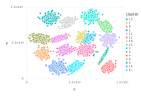

In [43]:
# 視覺化分群結果
plot(data, x="x", y="y", color="cluster", Geom.point)